## Language Modeling
A system that does
- the task of predicting what word comes next
- given a sequence of words $x_1,x_2,...,x_t$ compute the conditional distribution of the next word $x_{t+1}$.
$$P(x_{t+1}|x_t,...,x_1)$$

And by the computed conditional distribution, we can assign probability to a piece of text.
$$ P(x_1,...,x_T) = \prod_{t=1}^T P(x_t|x_{t-1},...,x_1)$$




## Why LM
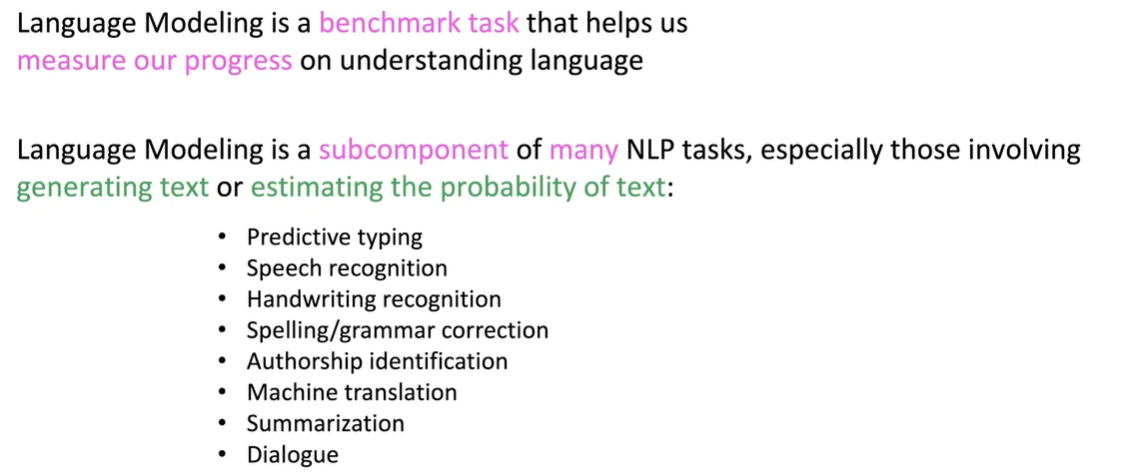


## N-gram Language Models
Assumption:
- x_{t+1} depends only on the preceding $n-1$ words
$$P(x_{t+1}|x_{t},...,x_1) = P(x_{t+1}|x_t,...,x_{t-n+2}) = \frac{P(x_{t+1},...,x_{t-n+2})}{P(x_t,...,x_{t-n+2})}$$

Use the frequency in large corpus of text as n-gram probability.

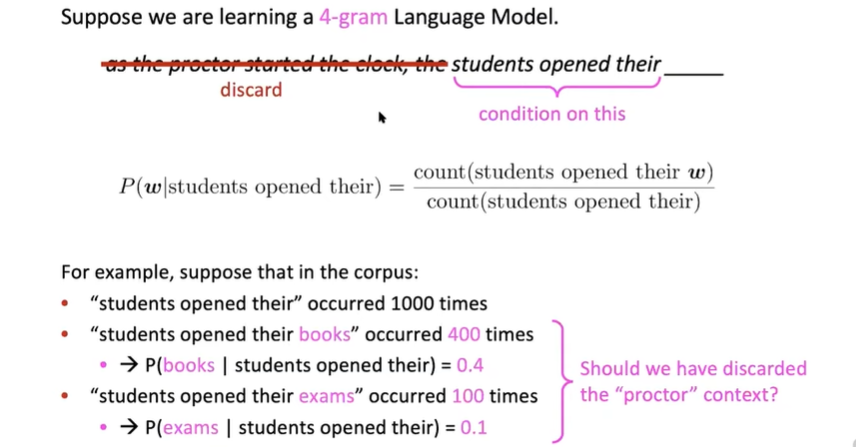

Cons:
- Lack of flexible context
- Sparsity problem
if take longer text for context, some text never show in the corpus; if take shorter text to solve sparsity, it lacks context
- Storage problem: we need to store all the n-grams


## Neural Language Model
### A fixed-window neural language model
Idea: text with similar semantics should output similar conditional probability distribution
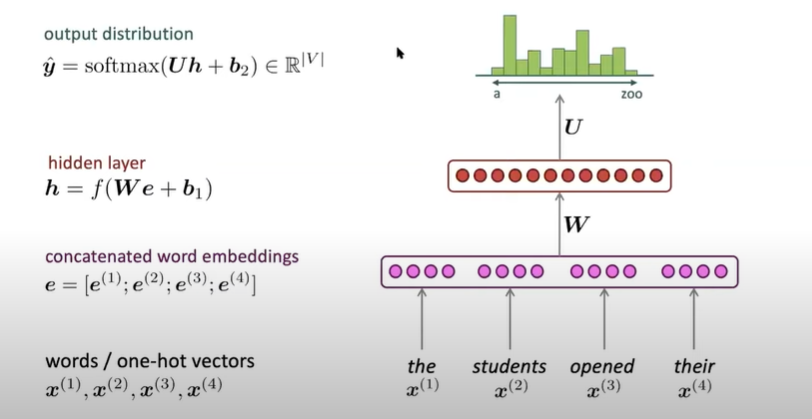

Cons:
- Still not fix the lack in flexible context
- Fixed size in input

### A simple RNN LM
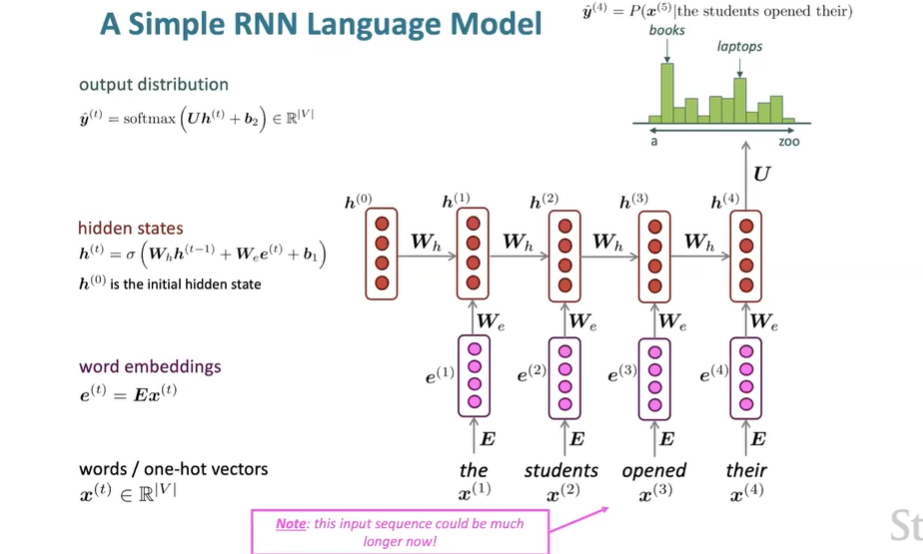

### Training RNN
Data: a big corpus of text        
Loss: $$L^{(t)}(\theta) = - \sum_{w\in V}y_w^{(t)}log\hat y_w^{(t)} = - log\hat y_{x_{t+1}}^{(t)}$$
$$ L(\theta) = 1/T\sum_{t=1}^T L^{(t)}(\theta) = - 1/T \sum_{t=1}^T log \hat y_{x_{t+1}}^{(t)}$$

Optimization:
- gradient
$W_h$


### Generating with RNN
By repeated sampling
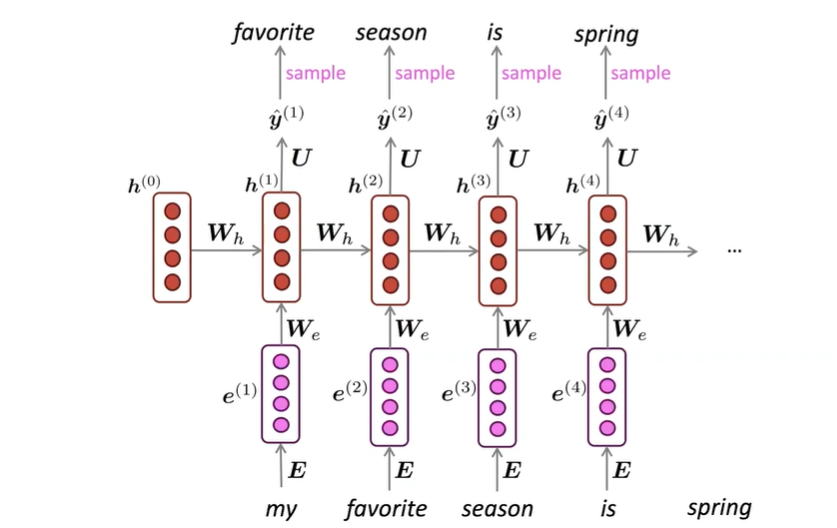

### Evaluating Language Models
The standard evaluation metric for Language Models is perplexity.
$$perplexity = \prod_{t=1}^T (\frac1{P_{LM}(x^{(t+1)}|x^{(t),...,x})})^{1/T} = \prod_{t=1}^T(\frac1{\hat y_{x_{t+1}}^{(t)}})^{1/T}$$
$$=exp(\frac1T\sum_{t=1}^T-log\hat y_{x_{t+1}}^{(t)})$$
等价于似然

### Other RNN uses
- Sequenct tagging: POS
- Sentence classification: Sentiment classification
- Language encoder module(可理解为特征提取器): QA, machine translation...
- Language decoder module(generate text):speech recognition, machine translation, summarization...



### Problems with RNN
- Vanishing 
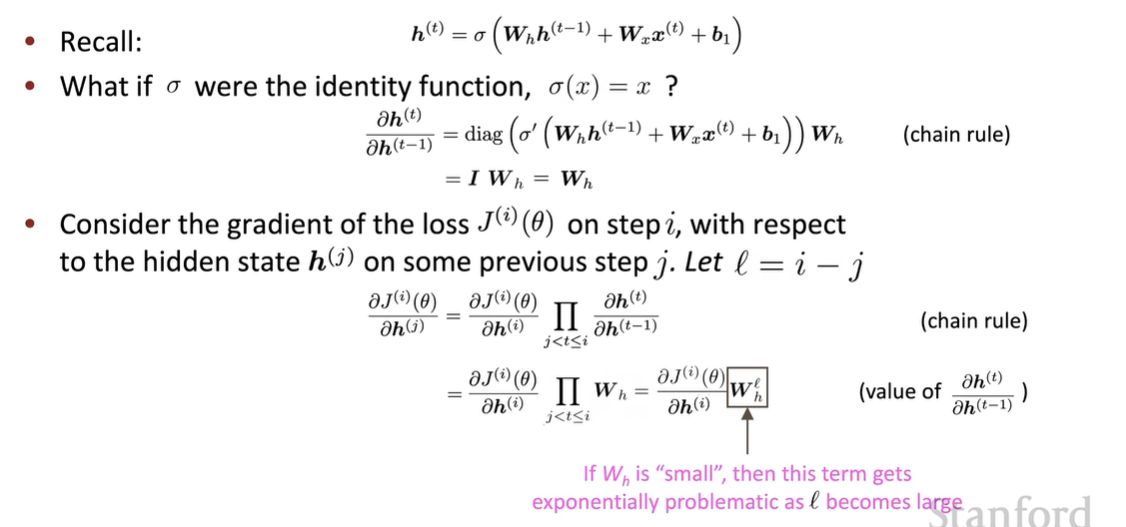
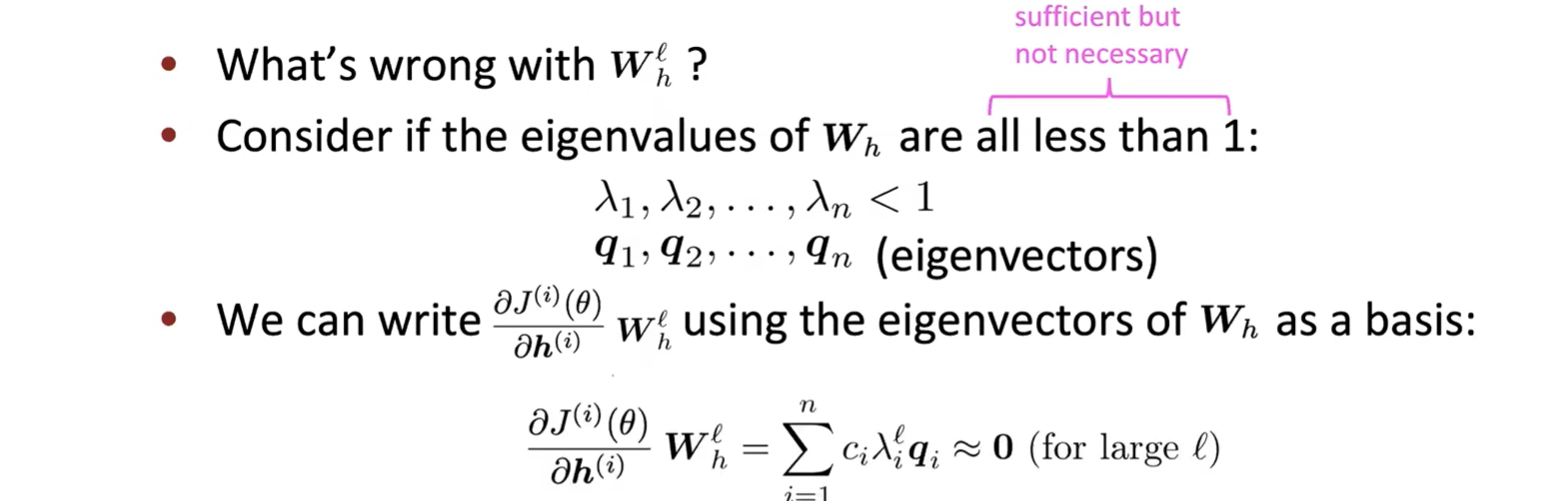
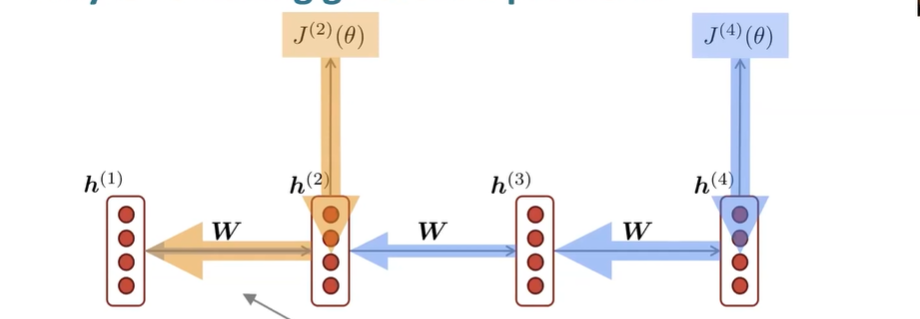
In this case gradient signal from very early is lost in later loss contribution because it's much smaller than the gradient signal nearby.

So model weights are updated only with near effects.

- Exploding gradients
bad updates; numerical unstability.
Solution: gradient clipping
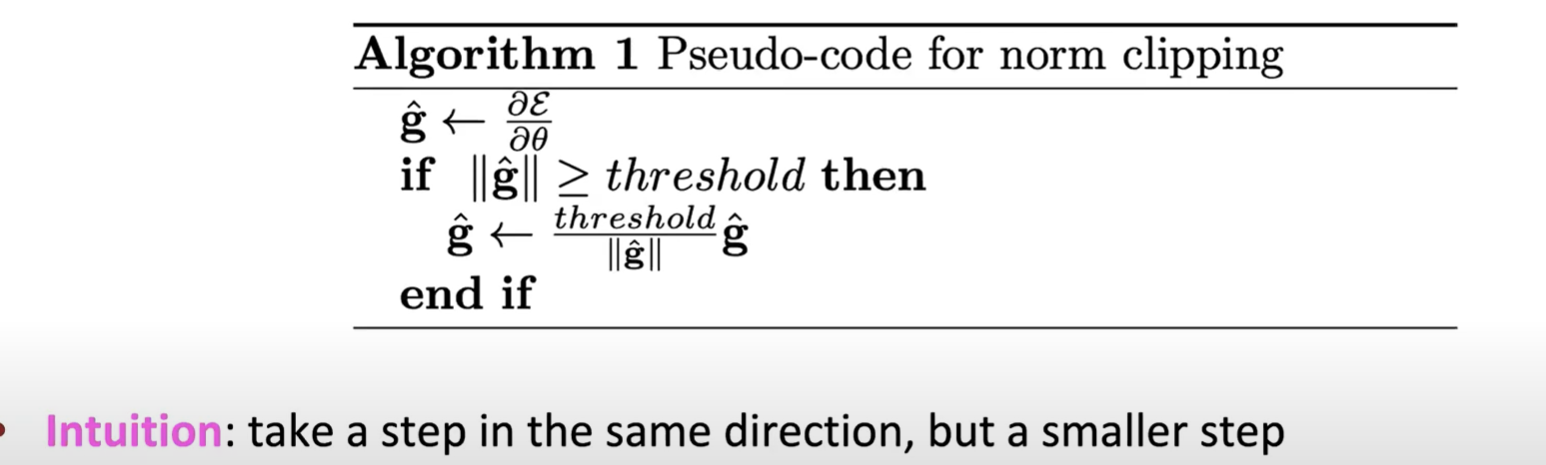

### Vanishing gradients soluiton: LSTM

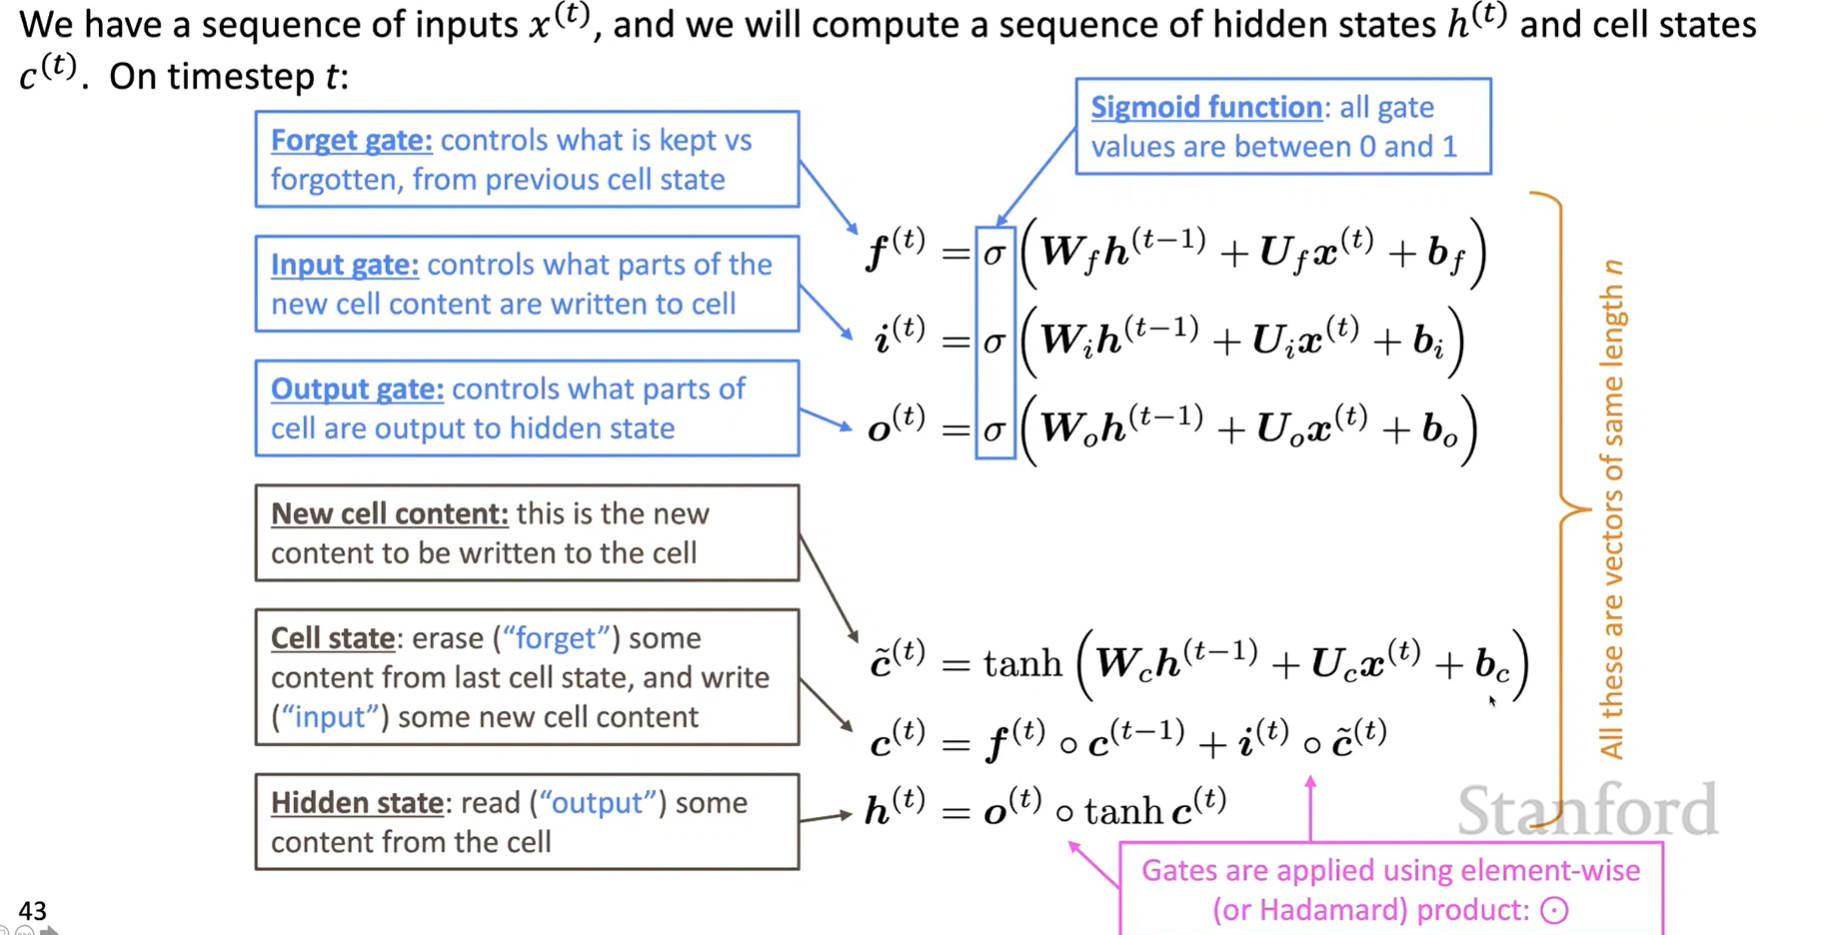   
gate 和 cell可并行计算。
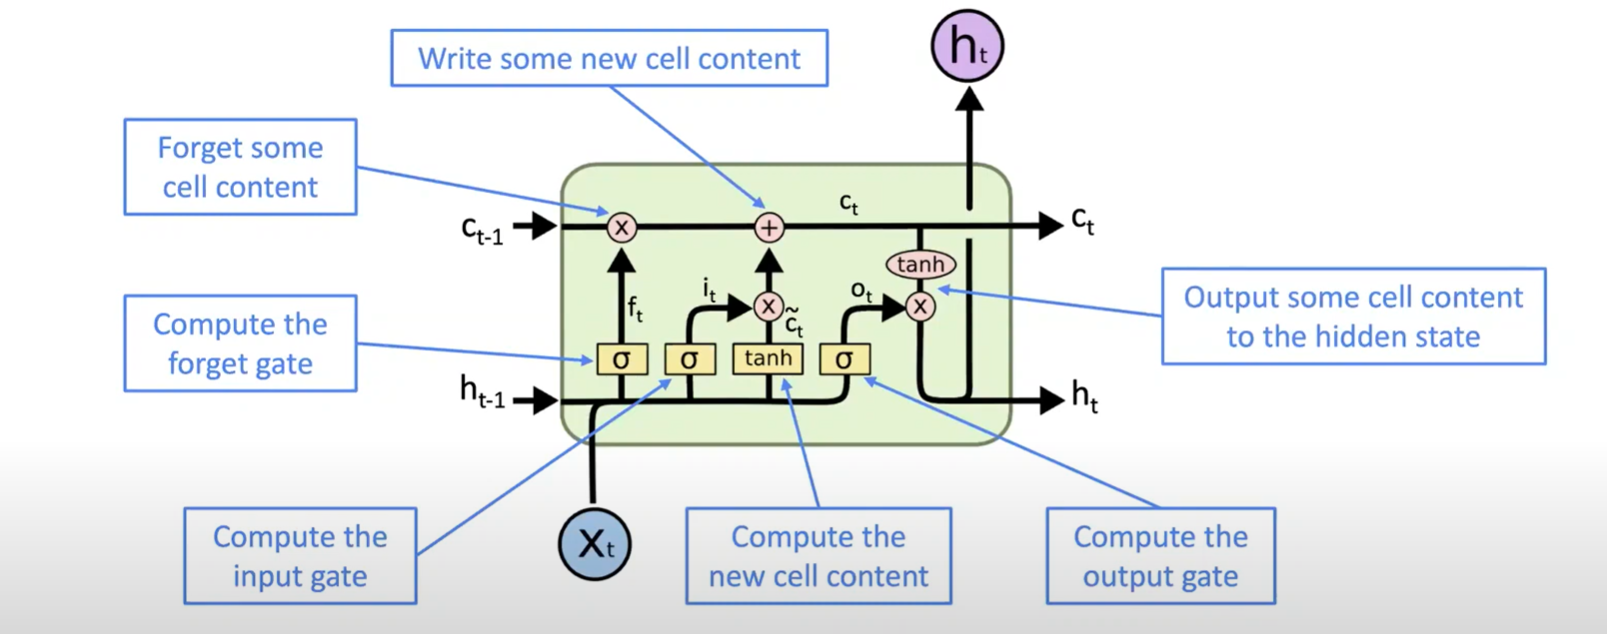
关键在于我们在写入新信息时，使用的是加号！   
这使得我们很容易记忆长期的信息，比RNN不那么容易出现梯度消失/爆炸的情况

### Bidirection RNN
Using RNN, the hidden state we get can be ssen as contextual representation of the words, compared with normal word embedding.

RNN获取的是从左到右的语境信息
通过使用Bidrection RNN，可以构造使用双向语境的contextual representation
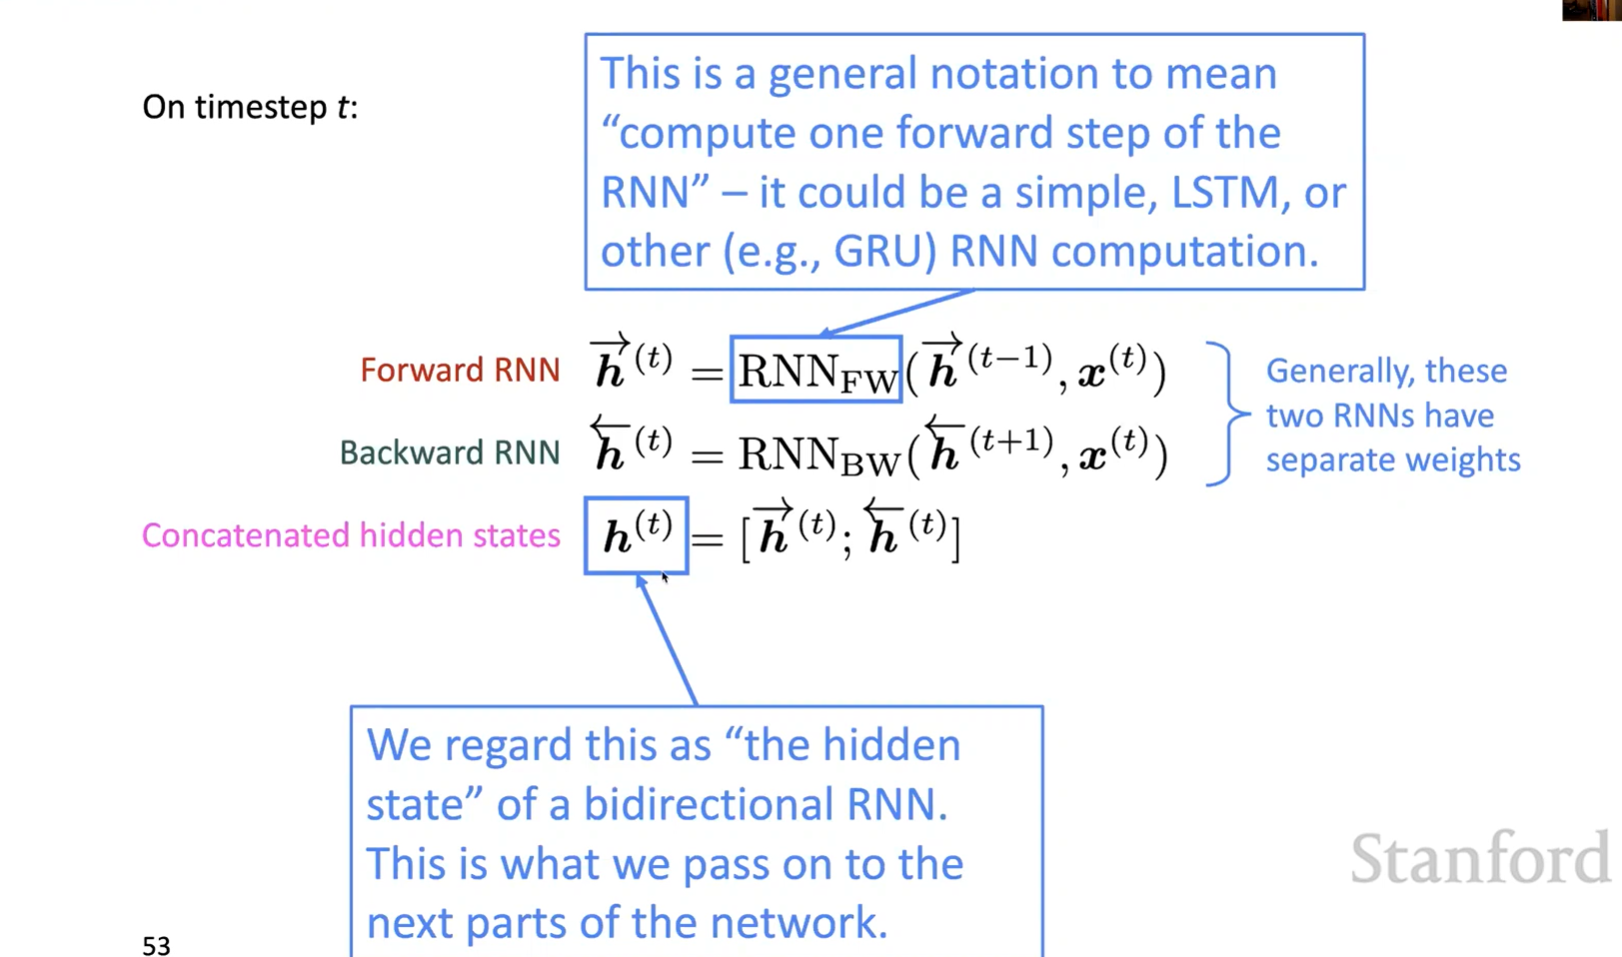
在需要使用这种语境信息的场景下很适用

类比BERT就是Bidirectional Encoder Represiontations from Transformer